In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("/home/jhomara/Desktop/statsLinks.csv", sep="\t", names=["table", "ratio"], dtype={'table': np.str}, index_col=False)

In [3]:
df.head()

,table,ratio
0,896639.3,0.125000
1,298767.2,0.333333
2,298767.3,0.500000
3,298767.4,1.000000
4,15706.1,0.250000


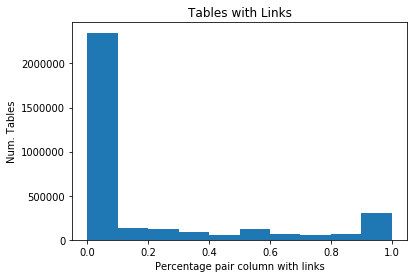

In [4]:
ax=df[df["ratio"]<=1].hist()
ax[0][0].set(xlabel='Percentage pair column with links', ylabel='Num. Tables', title='Tables with Links')
ax[0][0].grid(False)

In [5]:
df.sort_values("cont", ascending=False).head()

KeyError: 'cont'

In [ ]:
df[df['cont']>=2].hist(bins=100)

In [ ]:
dfc=pd.read_csv("clusterByPairs6.csv", sep="\t", names=["cluster", "tabla", "header"],  dtype={'tabla': np.str})

In [ ]:
dfTabla=pd.DataFrame(dfc["tabla"], dtype=np.str)

In [ ]:
dfc_cluster=pd.DataFrame({'count' : dfc.groupby(['cluster']).size()}).reset_index()

In [ ]:
dfc_cluster.head(10)

In [ ]:
dfc_cluster[dfc_cluster["count"]==1].count()

In [ ]:
dfc_cluster.sort_values("cluster", ascending=False).head()

In [ ]:
histc=dfc_cluster[dfc_cluster["count"]>=10000]["count"].hist(bins=100)
histc.set(xlabel='Num. Tables', ylabel='Num. Clusters', title='Tables per cluster')
histc.grid(False)

In [ ]:
dfc_clusterm=dfc_cluster[dfc_cluster["count"]==1]
dfc_clusterm.count()

In [ ]:
histc2=dfc_cluster[dfc_cluster["count"]<=10]["count"].hist()
histc2.set(xlabel='Num. Tables', ylabel='Num. Clusters', title='Tables per cluster')
histc2.grid(False)

In [ ]:
c7=dfc[dfc["cluster"]==8]
c7h=pd.DataFrame({'count' : c7.groupby(['header']).size()}).reset_index()
c7h.head()

In [ ]:
c0=dfc[dfc["cluster"]==7]
c0.head()

In [ ]:
c0f=pd.DataFrame()
c0f["header"]=c0["header"]
c0f["header"]=c0f["header"].apply(lambda x: str(eval(x)[0]))
c0f.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
#Token_pattern changed because there is headers with one letter. 
vectorizer = CountVectorizer(list(c0f['header']), token_pattern='(?u)\\b\\w+\\b')
vectorizer

In [ ]:
dtm = vectorizer.fit_transform(c0f['header'])
vocab = vectorizer.get_feature_names()

In [ ]:
len(vocab)

In [ ]:
dtm=dtm.toarray()
dtm

In [ ]:
fnd=pd.DataFrame(dtm, columns=vocab)

In [ ]:
fndsum=pd.DataFrame(fnd.sum(), columns=["value"])
fndsum.head()

In [ ]:
fndsum=fndsum.drop(['3'])

In [ ]:
fndsumf=fndsum[fndsum["value"]>10].sort_values("value", ascending =False)
values=fndsumf["value"].tolist()

In [ ]:
fig = plt.figure(figsize=(100,10))
ax=fndsumf.plot.bar(rot=0)
cont=0
x_offset = -0.03
y_offset = 0
for i in ax.patches:    
    b = i.get_bbox()    
    ax.annotate(values[cont], ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    cont+=1
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfe=pd.read_csv("headersEvaluation.csv", index_col=False, names=["table", "headers"], dtype={'table':np.str}, sep="\t")
dfe.head()

,table,headers
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'..."
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'..."
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref..."
3,775711.1,"['incom_parti@3', 'previou_parti@3']"
4,141713.1,"['number_state_legislatur@1', 'parti@3']"


In [2]:
ch=pd.DataFrame({'count' : dfe.groupby(['headers']).size()}).reset_index()

In [6]:
top10=ch.sort_values('count', ascending=False).head(10)

In [12]:
import matplotlib.pyplot as plt
x=top10["headers"].tolist()
y=top10["count"].tolist()


<BarContainer object of 10 artists>

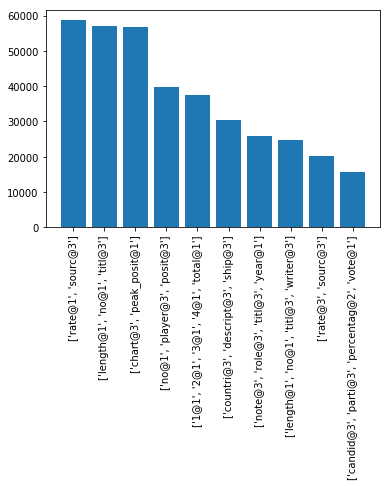

In [17]:
plt.xticks(rotation=90)
plt.bar(x,y)

In [19]:
top10

,headers,count
567737,"['rate@1', 'sourc@3']",58671
494783,"['length@1', 'no@1', 'titl@3']",57097
247442,"['chart@3', 'peak_posit@1']",56691
535652,"['no@1', 'player@3', 'posit@3']",39625
5433,"['1@1', '2@1', '3@1', '4@1', 'total@1']",37594
305194,"['countri@3', 'descript@3', 'ship@3']",30398
540816,"['note@3', 'role@3', 'titl@3', 'year@1']",25869
494770,"['length@1', 'no@1', 'titl@3', 'writer@3']",24730
567772,"['rate@3', 'sourc@3']",20285
214024,"['candid@3', 'parti@3', 'percentag@2', 'vote@1']",15587


In [21]:
dfe[dfe["headers"]=="['rate@3', 'sourc@3']"]

,table,headers
357,591336.1,"['rate@3', 'sourc@3']"
392,462216.1,"['rate@3', 'sourc@3']"
453,623533.1,"['rate@3', 'sourc@3']"
740,684873.1,"['rate@3', 'sourc@3']"
904,813988.1,"['rate@3', 'sourc@3']"
1049,267340.1,"['rate@3', 'sourc@3']"
1098,887456.1,"['rate@3', 'sourc@3']"
1101,116858.1,"['rate@3', 'sourc@3']"
1111,631620.1,"['rate@3', 'sourc@3']"
1121,162377.1,"['rate@3', 'sourc@3']"


In [35]:
ch.count()

headers    589854
count      589854
dtype: int64

In [36]:
ch["count"].sum()

3041290

In [86]:
ch.head()

,headers,count,count2,range
0,"['""""_brand_station@1', '""statoil""_brand_statio...",1,1,"(0, 1]"
1,"['""""_compromis_model@3', '""omelco_consensus""_m...",1,1,"(0, 1]"
2,"['""+""_quantifi@3', '>_index_captur@3', 'backre...",1,1,"(0, 1]"
3,"['""@1', 'bullet@3', 'load@3']",1,1,"(0, 1]"
4,"['""@1', 'cal@1', 'mm@1', 'oper@3']",1,1,"(0, 1]"


In [87]:
cols = ['headers']
ch2=dfe.join(ch.set_index(cols),on=cols)
ch2.head()

,table,headers,count,count2,range
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,38,"(35, 45]"
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,38,"(35, 45]"
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619,619,"(600, 700]"
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103,103,"(100, 200]"
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1,1,"(0, 1]"


In [147]:
x=ch2["count"].tolist()

In [103]:
mu=sum(x) / float(len(x))
mu

6240.238553377021

Text(0,0.5,'Num. Tables')

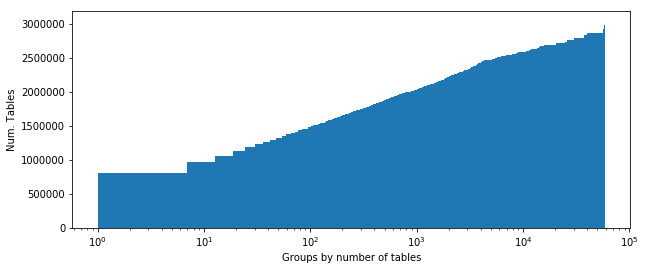

In [148]:
fig, ax = plt.subplots(figsize=(10, 4))
bins=100
sigma = 1000
ax.set_xscale('log', basex=10)
n, bins, patches = ax.hist(x, bins=10000,density=False, cumulative=True, label='Num. Tables')
ax.set_xlabel('Groups by number of tables')
ax.set_ylabel('Num. Tables')

In [46]:
ch3=ch.copy()
ch3.head()

,headers,count
0,"['""""_brand_station@1', '""statoil""_brand_statio...",1
1,"['""""_compromis_model@3', '""omelco_consensus""_m...",1
2,"['""+""_quantifi@3', '>_index_captur@3', 'backre...",1
3,"['""@1', 'bullet@3', 'load@3']",1
4,"['""@1', 'cal@1', 'mm@1', 'oper@3']",1


In [83]:
cols = ['headers']
ch3=dfe.join(ch3.set_index(cols),on=cols)
ch3.head()

,table,headers,count,5,10,15,25,50,100,250,...,750,1000,2500,5000,7500,10000,25000,50000,100000,500000
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
ch3['5']=0
ch3['10']=0
ch3['15']=0
ch3['25']=0
ch3['50']=0
ch3['100']=0
ch3['250']=0
ch3['500']=0
ch3['750']=0
ch3['1000']=0
ch3['2500']=0
ch3['5000']=0
ch3['7500']=0
ch3['10000']=0
ch3['25000']=0
ch3['50000']=0
ch3['100000']=0
ch3['500000']=0

In [49]:
ch3.loc[(ch3['count'] <=5) , ['5']] = 1
ch3.loc[(ch3['count'] <=10) , ['10']]=1
ch3.loc[(ch3['count'] <=15) , ['15']]=1
ch3.loc[(ch3['count'] <=25) , ['25']]=1
ch3.loc[(ch3['count'] <=50) , ['50']]=1
ch3.loc[(ch3['count'] <=100) , ['100']]=1
ch3.loc[(ch3['count'] <=250) , ['250']]=1
ch3.loc[(ch3['count'] <=500) , ['500']]=1
ch3.loc[(ch3['count'] <=750) , ['750']]=1
ch3.loc[(ch3['count'] <=1000) , ['1000']]=1
ch3.loc[(ch3['count'] <=2500) , ['2500']]=1
ch3.loc[(ch3['count'] <=5000) , ['5000']]=1
ch3.loc[(ch3['count'] <=7500) , ['7500']]=1
ch3.loc[(ch3['count'] <=10000) , ['10000']]=1
ch3.loc[(ch3['count'] <=25000) , ['25000']]=1
ch3.loc[(ch3['count'] <=50000) , ['50000']]=1
ch3.loc[(ch3['count'] <=100000) , ['100000']]=1
ch3.loc[(ch3['count'] <=500000) , ['500000']]=1
ch3.head()

,headers,count,5,10,15,25,50,100,250,500,750,1000,2500,5000,7500,10000,25000,50000,100000,500000
0,"['""""_brand_station@1', '""statoil""_brand_statio...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['""""_compromis_model@3', '""omelco_consensus""_m...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['""+""_quantifi@3', '>_index_captur@3', 'backre...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"['""@1', 'bullet@3', 'load@3']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"['""@1', 'cal@1', 'mm@1', 'oper@3']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


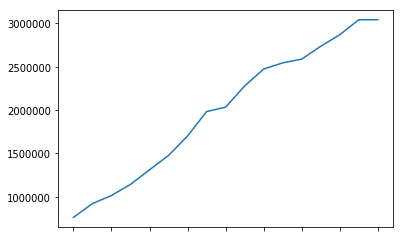

In [84]:
ch3[['5','10', '15', '25','50','100','250','750','1000','2500','5000','7500','10000','25000','50000','100000','500000']].sum().plot()

In [85]:
ch3[['5','10', '15', '25','50','100','250','750','1000','2500','5000','7500','10000','25000','50000','100000','500000']].sum()

5          762438
10         921637
15        1015059
25        1143466
50        1311060
100       1476699
250       1700874
750       1982484
1000      2033432
2500      2277545
5000      2472980
7500      2544071
10000     2587403
25000     2735345
50000     2868831
100000    3041290
500000    3041290
dtype: int64

In [43]:
cols = ['headers']
df_merge=dfe.join(ch.set_index(cols),on=cols)
df_merge.head()

,table,headers,count,5,10,15,25,50,100,250,...,750,1000,2500,5000,7500,10000,25000,50000,100000,500000
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,0,0,0,0,38,38,38,...,38,38,38,38,38,38,38,38,38,38
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,0,0,0,0,38,38,38,...,38,38,38,38,38,38,38,38,38,38
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619,0,0,0,0,0,0,0,...,619,619,619,619,619,619,619,619,619,619
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103,0,0,0,0,0,0,103,...,103,103,103,103,103,103,103,103,103,103
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [57]:
ch.head()

,headers,count
0,"['""""_brand_station@1', '""statoil""_brand_statio...",1
1,"['""""_compromis_model@3', '""omelco_consensus""_m...",1
2,"['""+""_quantifi@3', '>_index_captur@3', 'backre...",1
3,"['""@1', 'bullet@3', 'load@3']",1
4,"['""@1', 'cal@1', 'mm@1', 'oper@3']",1


In [58]:
ch['count2'] = ch['count']
ch.loc[(ch['count2'] >=1000) & (ch['count2'] <5000), ['count2']] = 2000
ch.loc[(ch['count2'] >=5000) & (ch['count2'] <10000), ['count2']] = 5000
ch.loc[(ch['count2'] >=10000), ['count2']] = 10000
ch.head()

,headers,count,count2
0,"['""""_brand_station@1', '""statoil""_brand_statio...",1,1
1,"['""""_compromis_model@3', '""omelco_consensus""_m...",1,1
2,"['""+""_quantifi@3', '>_index_captur@3', 'backre...",1,1
3,"['""@1', 'bullet@3', 'load@3']",1,1
4,"['""@1', 'cal@1', 'mm@1', 'oper@3']",1,1


In [59]:
ch.sort_values("count2", ascending=False).head()

,headers,count,count2
247442,"['chart@3', 'peak_posit@1']",56691,10000
494783,"['length@1', 'no@1', 'titl@3']",57097,10000
93459,"['apr@3', 'aug@3', 'dec@3', 'feb@3', 'jan@3', ...",14305,10000
540816,"['note@3', 'role@3', 'titl@3', 'year@1']",25869,10000
494770,"['length@1', 'no@1', 'titl@3', 'writer@3']",24730,10000


In [60]:
lb=[]
b=np.arange(0,5,1)
lb.extend(b)
b=np.arange(5,50,10)
lb.extend(b)
b=np.arange(50,100,25)
lb.extend(b)
b=np.arange(100,1000,100)
lb.extend(b)
b=np.arange(1000,5000,1000)
lb.extend(b)
b=np.arange(5000,10000,1000)
lb.extend(b)
b=np.arange(10000,40000,1000)
lb.extend(b)
ch['range'] = pd.cut(ch['count2'], lb)
ch.sort_values("count2", ascending=False).head()

,headers,count,count2,range
247442,"['chart@3', 'peak_posit@1']",56691,10000,"(9000, 10000]"
494783,"['length@1', 'no@1', 'titl@3']",57097,10000,"(9000, 10000]"
93459,"['apr@3', 'aug@3', 'dec@3', 'feb@3', 'jan@3', ...",14305,10000,"(9000, 10000]"
540816,"['note@3', 'role@3', 'titl@3', 'year@1']",25869,10000,"(9000, 10000]"
494770,"['length@1', 'no@1', 'titl@3', 'writer@3']",24730,10000,"(9000, 10000]"


In [61]:
chg=pd.DataFrame({'count' : ch.groupby("range").size()}).reset_index()
chg.head()

,range,count
0,"(0, 1]",414593
1,"(1, 2]",78420
2,"(2, 3]",26674
3,"(3, 4]",16177
4,"(4, 5]",9255


In [62]:
chg["count"].sum()

589854

In [63]:
chg['range']=chg['range'].astype(str)
chg=chg[chg['count']>0]
chg.head()

,range,count
0,"(0, 1]",414593
1,"(1, 2]",78420
2,"(2, 3]",26674
3,"(3, 4]",16177
4,"(4, 5]",9255


In [64]:
chg.loc[(chg['range'] =='(900, 1000]'), ['range']] = '900-999'
chg.loc[(chg['range'] =='(1000, 2000]'), ['range']] = '1000-4999'
chg.loc[(chg['range'] =='(4000, 5000]'), ['range']] = '5000-9999'
chg.loc[(chg['range'] =='(9000, 10000]'), ['range']] = '>=10000'
chg.head()

,range,count
0,"(0, 1]",414593
1,"(1, 2]",78420
2,"(2, 3]",26674
3,"(3, 4]",16177
4,"(4, 5]",9255


len rects: 24
len tags: 24


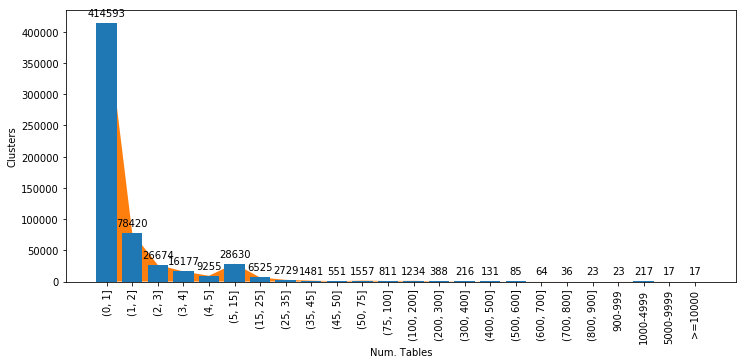

In [65]:
x1=chg["range"]
y1=chg["count"]
tags=chg["count"].tolist()
plt.figure(figsize=(12,5))
ax=plt.bar(x1, y1)
plt.xlabel("Num. Tables")
plt.ylabel("Clusters")
plt.fill_between(x1,y1)
plt.xticks(rotation=90)

rects = ax.patches
print("len rects:", len(rects))
print("len tags:", len(tags))

# For each bar: Place a label
cont=0
for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5    
    va = 'bottom'
    if y_value < 0:
        space *= -1
        va = 'top'
    label = "{}".format(tags[cont])
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
    cont+=1
plt.show()

In [ ]:
chg.head()

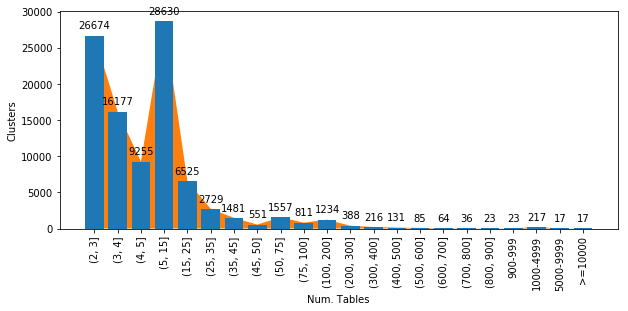

In [66]:
chg=chg[chg['count']<70000]
x1=chg["range"]
y1=chg["count"]
tags=chg["count"].tolist()
plt.figure(figsize=(10,4))
ax=plt.bar(x1, y1) 
plt.xlabel("Num. Tables")
plt.ylabel("Clusters")
plt.fill_between(x1,y1)
plt.xticks(rotation=90)

rects = ax.patches
# For each bar: Place a label
cont=0
for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5    
    va = 'bottom'
    if y_value < 0:
        space *= -1
        va = 'top'
    label = "{}".format(tags[cont])
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
    cont+=1
plt.show()

In [8]:
cols = ['headers']
df_merge=dfe.join(ch.set_index(cols),on=cols)
df_merge.head()

,table,headers,count
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1


In [67]:
df_merge[(df_merge["count"]>50) & (df_merge["count"]<100)].count()

table      163639
headers    163639
count      163639
dtype: int64

In [18]:
df_merge[(df_merge["count"]>50) & (df_merge["count"]<100)].to_csv("morethan50.csv", sep="\t")

In [68]:
numTablesCount=pd.DataFrame({'num_tables' : df_merge.groupby(['count']).size()}).reset_index()
numTablesCount.head()

,count,num_tables
0,1,414593
1,2,156840
2,3,80022
3,4,64708
4,5,46275


In [69]:
numTablesCount["num_tables"].sum()

3041290

In [70]:
numTablesCount["percentage"]=(numTablesCount["num_tables"]*100)/3041290
numTablesCount.head()

,count,num_tables,percentage
0,1,414593,13.632143
1,2,156840,5.157022
2,3,80022,2.631186
3,4,64708,2.127650
4,5,46275,1.521558


In [71]:
ntc = numTablesCount
ntc.head()

,count,num_tables,percentage
0,1,414593,13.632143
1,2,156840,5.157022
2,3,80022,2.631186
3,4,64708,2.127650
4,5,46275,1.521558


In [72]:
ntc.head()

,count,num_tables,percentage
0,1,414593,13.632143
1,2,156840,5.157022
2,3,80022,2.631186
3,4,64708,2.127650
4,5,46275,1.521558


In [73]:
ntc['log_nt'] = np.log(ntc["count"])
ntc.head()

,count,num_tables,percentage,log_nt
0,1,414593,13.632143,0.000000
1,2,156840,5.157022,0.693147
2,3,80022,2.631186,1.098612
3,4,64708,2.127650,1.386294
4,5,46275,1.521558,1.609438


In [80]:
x1=ntc["count"]
y1=ntc["percentage"]

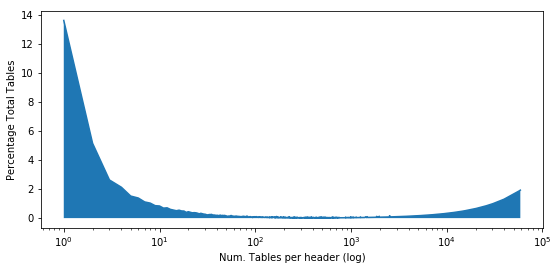

In [81]:
plt.figure(figsize=(9,4))
plt.plot(x1, y1) 
plt.xlabel("Num. Tables per header (log)")
plt.ylabel("Percentage Total Tables")
plt.xscale('log', basex=10)
plt.fill_between(x1,y1)
plt.show()
#histc.set(xlabel='Num. Tables', ylabel='Num. Clusters', title='Tables per cluster')

In [114]:
lb=[]
b=np.arange(0,5,1)
lb.extend(b)
b=np.arange(5,25,2)
lb.extend(b)
b=np.arange(26,50,10)
lb.extend(b)
b=np.arange(51,1000,100)
lb.extend(b)
b=np.arange(1000,40000,1000)
lb.extend(b)
b=np.arange(40000,500000,10000)
lb.extend(b)
ntc['range'] = pd.cut(ntc['count'], lb)

#numTablesCount=pd.DataFrame({'num_tables' : df_merge.groupby(['count']).size()}).reset_index()

,range,sum
0,"(0, 1]",414593
1,"(1, 2]",156840
2,"(2, 3]",80022
3,"(3, 4]",64708
4,"(4, 5]",46275


In [121]:
ntc.head()

,count,num_tables,percentage,log_nt,range
0,1,414593,13.632143,0.000000,"(0, 1]"
1,2,156840,5.157022,0.693147,"(1, 2]"
2,3,80022,2.631186,1.098612,"(2, 3]"
3,4,64708,2.127650,1.386294,"(3, 4]"
4,5,46275,1.521558,1.609438,"(4, 5]"


In [124]:
df_merge.head()

,table,headers,count
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1


In [133]:
cols = ['count']
df_merge3=df_merge.join(ntc.set_index(cols),on=cols)
df_merge3.head()

,table,headers,count,num_tables,percentage,log_nt,range
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,6270,0.206163,3.637586,"(36, 46]"
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,6270,0.206163,3.637586,"(36, 46]"
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619,1238,0.040706,6.428105,"(551, 651]"
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103,2987,0.098215,4.634729,"(51, 151]"
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1,414593,13.632143,0.000000,"(0, 1]"


In [126]:
df_merge3.head()

,table,headers,count,num_tables,percentage,log_nt,range
0,896639.1,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,6270,0.206163,3.637586,"(36, 46]"
1,896639.2,"['english_titl@3', 'mandarin_titl@3', 'note@3'...",38,6270,0.206163,3.637586,"(36, 46]"
2,896639.3,"['award@3', 'categori@3', 'nomin_work@3', 'ref...",619,1238,0.040706,6.428105,"(551, 651]"
3,775711.1,"['incom_parti@3', 'previou_parti@3']",103,2987,0.098215,4.634729,"(51, 151]"
4,141713.1,"['number_state_legislatur@1', 'parti@3']",1,414593,13.632143,0.000000,"(0, 1]"


In [134]:
df_merge3=df_merge3.sort_values("range", ascending=True)

In [135]:
df_merge3.head()

,table,headers,count,num_tables,percentage,log_nt,range
1831864,1117991.1,"['processor@3', 'stage@3']",1,414593,13.632143,0.0,"(0, 1]"
1883288,94613.16,"['athlet@3', 'event@3', 'lap@1', 'point@1', 'r...",1,414593,13.632143,0.0,"(0, 1]"
1325577,26770.4,"['apg@2', 'bpg@2', 'game_play@1', 'mpg@2', 'pl...",1,414593,13.632143,0.0,"(0, 1]"
1463145,794035.6,"['divis@3', 'probabl_singl_game@3', 'requir_nu...",1,414593,13.632143,0.0,"(0, 1]"
1883262,165350.37,"['england@4', 'māori@4', '–@4']",1,414593,13.632143,0.0,"(0, 1]"


In [136]:
df_merge3['range']=df_merge3['range'].astype(str)
df_merge3.head()

,table,headers,count,num_tables,percentage,log_nt,range
1831864,1117991.1,"['processor@3', 'stage@3']",1,414593,13.632143,0.0,"(0, 1]"
1883288,94613.16,"['athlet@3', 'event@3', 'lap@1', 'point@1', 'r...",1,414593,13.632143,0.0,"(0, 1]"
1325577,26770.4,"['apg@2', 'bpg@2', 'game_play@1', 'mpg@2', 'pl...",1,414593,13.632143,0.0,"(0, 1]"
1463145,794035.6,"['divis@3', 'probabl_singl_game@3', 'requir_nu...",1,414593,13.632143,0.0,"(0, 1]"
1883262,165350.37,"['england@4', 'māori@4', '–@4']",1,414593,13.632143,0.0,"(0, 1]"


Text(0,0.5,'Num. Tables')

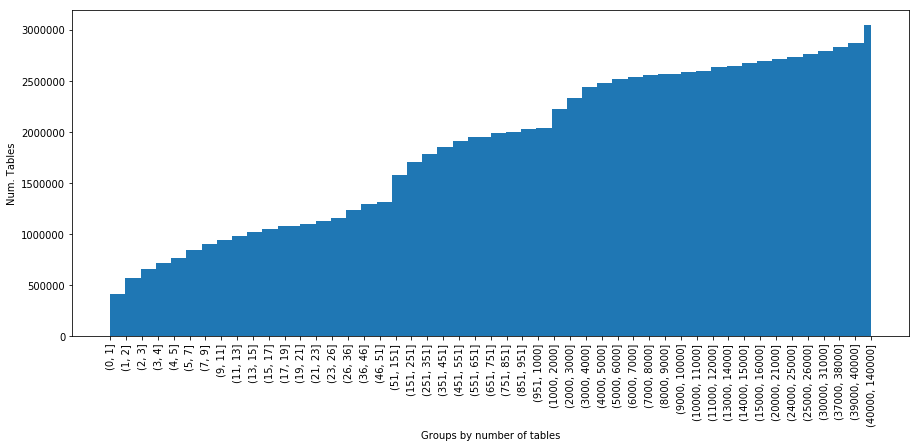

In [150]:
x=df_merge3['range'].tolist()
fig, ax = plt.subplots(figsize=(15, 6))
bins=100
sigma = 1000
plt.xticks(rotation='vertical')
n, bins, patches = ax.hist(x, bins=100,density=False, cumulative=True, label='Num. Tables')
ax.set_xlabel('Groups by number of tables')

ax.set_ylabel('Num. Tables')

In [138]:
#ntc['range']=ntc['range'].astype(str)
gntc=ntc.groupby("range")['num_tables'].agg(['sum']).reset_index()
gntc.head()
gntc['range']=gntc['range'].astype(str)
gntc.head()

,range,sum
0,"(0, 1]",414593
1,"(1, 2]",156840
2,"(2, 3]",80022
3,"(3, 4]",64708
4,"(4, 5]",46275


In [116]:
gntc["sum"].sum()

3041290

In [139]:
gntc["percentage"]=(gntc["sum"]*100)/3041290
gntc.head()

,range,sum,percentage
0,"(0, 1]",414593,13.632143
1,"(1, 2]",156840,5.157022
2,"(2, 3]",80022,2.631186
3,"(3, 4]",64708,2.127650
4,"(4, 5]",46275,1.521558


In [118]:
gntc.head()

,range,sum,percentage
0,"(0, 1]",414593,13.632143
1,"(1, 2]",156840,5.157022
2,"(2, 3]",80022,2.631186
3,"(3, 4]",64708,2.127650
4,"(4, 5]",46275,1.521558


In [140]:
xt=gntc["range"].tolist()
y=gntc["percentage"].tolist()

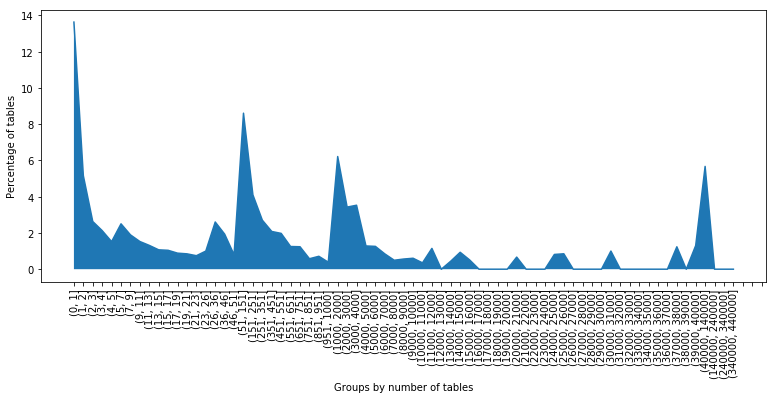

In [143]:
ax=gntc["percentage"].plot(figsize=(13,5), rot=90)
plt.xticks(range(100), xt)
plt.ylabel('Percentage of tables')
plt.xlabel('Groups by number of tables')
plt.fill_between(xt,y)
plt.show()

In [ ]:
ax

In [ ]:
#x=gntc["count"].loc[:,""].tolist()
#y=gntc["num_tables"].loc[:,"sum"].tolist()
gntc["num_tables"].loc[:,"sum"].sum()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 7.5)
plt.bar(x,y)
plt.show()

In [ ]:
ch[ch["count"]==1].count()
s1=ch[ch["count"]>=100]
s1["count"].sum()

In [ ]:
sch["count"].sum()

In [ ]:
ch.sort_values("count", ascending=False).head(10)

In [ ]:
dfeval=pd.read_csv("headersEvalRelations.csv", index_col=False, names=["table", "headers", "c1", "c2", "rel", "ratio"], dtype={'table':np.str}, sep="\t")


In [ ]:
dfeval.head()

In [ ]:
c1=dfeval[dfeval["headers"]=="['no@1', 'writer@3', 'length@1', 'titl@3']"]
c1.head()

In [ ]:
c1=c1.fillna("-")

In [ ]:
c1.head()

In [ ]:
chrel=pd.DataFrame({'count' : c1.groupby(['headers', 'c1', 'c2']).size()}).reset_index()
chrel.head()

In [ ]:
dh=pd.DataFrame(dfe.groupby(['table','headers']))

In [ ]:
dh.head()

In [ ]:
df1=pd.DataFrame()
df1["header"]=df["header1"].str.replace("[","").replace("]","")+df["header2"].str.replace("[","").replace("]","")



In [ ]:
df1.head()

In [ ]:
dfc_group.sort_values("count", ascending=False).head(100)

In [ ]:
dfc_group[dfc_group["count"]>100]["count"].hist(bins=50)

In [ ]:
dfc_group[dfc_group["count"]<=100]["count"].hist(bins=100)

In [ ]:
dfc[dfc["tabla"]=="140019.1"]

In [ ]:
dfc[dfc["cluster"]==15]

In [ ]:
dfc_group=pd.DataFrame({'count' : dfc.groupby(['cluster']).size()}).reset_index()

In [ ]:
dfc_group[dfc_group['count']>=100]['count'].hist(bins=100)

In [ ]:
dfc_group[dfc_group['count']<100]['count'].hist(bins=100)

In [ ]:
dfc[(dfc['header'].str.contains('parti@')) & (dfc['header'].str.contains('candid@'))]

In [ ]:
dfc[dfc["cluster"]==5477]

In [ ]:
df=pd.read_csv("dict.csv", sep="\t", names=["id","header", "count"])

In [ ]:
df.head()

In [ ]:
df[df["id"]==5]

In [ ]:
df.sort_values("count", ascending=False).head(100)

In [ ]:
df1=df[df["count"]>1]

In [ ]:
df1.to_csv("dict_filter.csv", sep="\t", index=False, header=False)

In [ ]:
df1.sort_values("id", ascending=True).head()

In [ ]:
df1[df1["header"]=="candid"]

In [ ]:
a=[235, 5, 38, 41, 14, 84, 98, 99, 250, 164, 122, 6, 79, 324, 35, 100, 85, 15, 64, 10, 184, 49, 183, 25, 95, 273, 298, 4]
print(len(a))
a=set(a)
print(len(a))

In [ ]:
df[df["id"].isin(a)].to_csv("dictionary.csv", index=False)

In [ ]:
vect=pd.read_csv("vect_extend.csv", sep="\t", names=["table", "headers", "num"], dtype={"table":np.str_})

In [ ]:
vect.sort_values("num", ascending=False).head()

In [ ]:
vect[vect["num"]<=100].head()

In [ ]:
vect.count()

In [ ]:
vect.num.hist(bins=100)

In [ ]:
vect.loc[3]["headers"]

In [ ]:
df_grouph=pd.DataFrame({'count' : vect.groupby(['headers', 'num']).size()}).reset_index()

In [ ]:
print(df_grouph.shape)
df_grouph=df_grouph.sort_values("count", ascending=False)
fg=df_grouph[df_grouph["num"]<=50]
fg.shape

In [ ]:
fg.head(100)
fg.loc[2163]["headers"]

In [ ]:
edges=pd.read_csv("edges.csv", sep="\t", decimal=".", names=["source", "target", "weight"])

In [ ]:
edges.head()

In [ ]:
#edges[(edges["source"]==1 & edges["target"]==549)]
edges[[all([a, b]) for a, b in zip(edges.source == 1, edges.target ==27)]]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
exclude = ['table','num']
cols=vect.columns.difference(exclude)
dfv=df_grouph.iloc[:][cols]
dfv.count()


In [ ]:
dfv.head()

In [ ]:
dft=pd.read_csv("testSimilitud.csv", sep="\t", names=["table", "cluster"] )
dft.head()

In [ ]:
dftg=pd.DataFrame({'count' : dft.groupby(['cluster']).size()}).reset_index()
dftg.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
#Token_pattern changed because there is headers with one letter. 
dfvect=pd.read_csv("vect.csv", sep="\t", names=["table", "header"] , dtype={'table': np.str})


In [ ]:
vectorizer = CountVectorizer(list(dfvect['header']), token_pattern='(?u)\\b\\w+\\b')
vectorizer

In [ ]:
dtm = vectorizer.fit_transform(dfvect['header'])
vocab = vectorizer.get_feature_names()

In [ ]:
len(vocab)

In [ ]:
dtm= dtm.toarray()

In [ ]:
dtm

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
#res = 1-pdist(dtm, 'jaccard')
res = pairwise_distances(dtm, metric = "jaccard", n_jobs=4)

In [ ]:
dfc1=dft[dft["cluster"]=="1"]

In [ ]:
dfc1.count()

In [ ]:
dfc1.to_csv("cluster1.csv", sep="\t", index=False)

In [ ]:
cluster1=pd.read_csv("fileClusterPair.csv", sep="\t", names=["table", "header","cluster"] , dtype={'table': np.str})
cluster1.head()

In [ ]:
cluster1_g=pd.DataFrame({'count' : cluster1.groupby(['cluster']).size()}).reset_index()

In [ ]:
cluster1_g.sort_values("count", ascending=False).head(100)

In [ ]:
cluster1[cluster1["cluster"]==2925].head(10000)